<a href="https://colab.research.google.com/github/Doc1H/PDReview/blob/main/Analyzing_CT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install numpy pandas matplotlib wordcloud nltk scikit-learn PyPDF2

In [ ]:
!pip3 install pyopenssl ndg-httpsclient pyasn1 urllib3

In [ ]:
#!pip3 install --upgrade Pillow
#%pip install --upgrade Pillow
!pip install Pillow==9.5.0
!pip install --upgrade numpy
!pip3 install --upgrade PyPDF2

In [ ]:
import numpy as np
import pandas as pd
import re

In [ ]:
#Visualización
!pip install wordcloud
import matplotlib.pyplot as plt
import matplotlib
from wordcloud import WordCloud, STOPWORDS


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#nltk librería de análisis de lenguaje
import nltk

#Este proceso puede hacerse antes de forma manual, descargar las stopwords de la librería nltk
nltk.download('stopwords')
nltk.download('wordnet')

from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

from nltk import tokenize

matplotlib.style.use('ggplot')
pd.options.mode.chained_assignment = None

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# 1.
# Traitement de PDF et extraire TOUS les mots du PDF pour les mettre dans un CSV
import re
import csv
from PyPDF2 import PdfReader
import unicodedata


whitelist_file = "/content/gdrive/My Drive/Colab Notebooks/csv/whitelist.csv"
pd_ct_csv_file = f'/content/gdrive/My Drive/Colab Notebooks/csv/PD-CT.csv'

#pd_csv_file à modifier par pd_ct_csv_file ou pd_math_csv_file
#pd_pdf_file à modifier par pd_ct_pdf_file ou pd_math_pdf_file

lines_written = 0  # Initialize the counter for lines written


pd_ct_pdf_file = f'/content/gdrive/My Drive/Colab Notebooks/pdf/The 3 concepts/RelationShip CT, CS, Math - Teachers - CT.pdf'
print("Test ")

# Open the PDF file in binary mode                            ------------- READ
with open(pd_ct_pdf_file, 'rb') as file:
    # Create a PDF reader object
    pdf_reader = PdfReader(file)
    # Get the number of pages in the PDF file
    num_pages = len(pdf_reader.pages)

    # Loop through each page and extract the text
    print("Test 1")
    all_text = '' # a string to store the extracted text from all pages
    for page in pdf_reader.pages:
        all_text += page.extract_text()

    # Use regular expressions to extract all words from the text
    words = re.findall(r'\b\w+\b', all_text)


    # Print the list of words
    print(words)
    print(len(words))
    print("Test 3: lines written=", lines_written)
    # Write the list of words to a CSV file                       ------------- WRITE (si je fais les tests attention )
    with open(pd_ct_csv_file, 'a', newline='') as csvfile: # The code opens the output CSV file (pd_cs_csv_file) in write mode "a": Mode "a" (append) : Ce mode permet d'écrire à la fin d'un fichier existant, sans effacer son contenu précédent. Si le fichier n'existe pas, il sera créé.
        csv_writer = csv.writer(csvfile)  # The code creates a "csv.writer" object.
        for word in words: #It iterates over the "words" list and writes each word as a row in the CSV file.
            #unicode_word = unicodedata.normalize('NFKD', word)
            csv_writer.writerow([word])
            lines_written += 1  # Increment the line counter
    print("Test 3: lines written=", lines_written)

# print("Test 4: lines written=", lines_written)

Test 
Test 1
['1', 'Relationship', 'CT', 'CS', 'Math', 'CT', 'definitions', 'Article', 'Nº', '1', 'Title', 'Infusing', 'Computational', 'Thinking', 'Across', 'Disciplines', 'Reflections', 'Lessons', 'Learned', 'Here', 'looking', 'in', 'Discussion', 'results', 'implications', 'and', 'or', 'Conclusion', 'In', 'the', 'results', 'or', 'discussion', 'do', 'the', 'researchers', 'link', 'CT', 'CS', 'activities', 'proposed', 'to', 'STEM', 'achievements', 'or', 'vice', 'versa', 'Yes', 'No', 'Sentence', 's', 'Now', 'in', 'the', 'whole', 'article', 'Definition', 'CT', 'is', 'a', 'problem', 'solving', 'methodology', 'implemented', 'with', 'a', 'computer', 'that', 'can', 'be', 'automated', 'transferred', 'and', 'applied', 'across', 'subjects', '1', 'Jeanette', 'Wing', '2', 'suggested', 'that', 'CT', 'is', 'a', 'fundamental', 'skill', 'of', 'analytical', 'thinking', 'for', 'everyone', 'which', 'influences', 'all', 'aspects', 'of', 'our', 'lives', 'from', 'protecting', 'our', 'personal', 'privacy', '

parallel processing
4
problem reduction
3
logical thinking
3
data representation
2
logical structure
2
design process
2
pattern generalization
2
software engineering
2
recursive thinking
1
parallel thinking
1
iterative logic
1
sequential logic
1
resource management
1
web development
1
conceptual knowledge
1
data collection
1
data analysis
1
parallel code
1
{'abstraction': 56, 'modeling': 20, 'developing': 15, 'simulation': 15, 'debugging': 14, 'logic': 13, 'communicating': 9, 'iteration': 8, 'generalization': 6, 'recursion': 5, 'collaborating': 4, 'parallel processing': 4, 'modularization': 3, 'modelling': 3, 'remixing': 3, 'problem reduction': 3, 'logical thinking': 3, 'abstracting': 2, 'data representation': 2, 'logical structure': 2, 'design process': 2, 'pattern generalization': 2, 'software engineering': 2, 'experimenting': 1, 'iterating': 1, 'reusing': 1, 'modularizing': 1, 'constant': 1, 'encapsulation': 1, 'recursive thinking': 1, 'parallel thinking': 1, 'iterative logic': 1, '

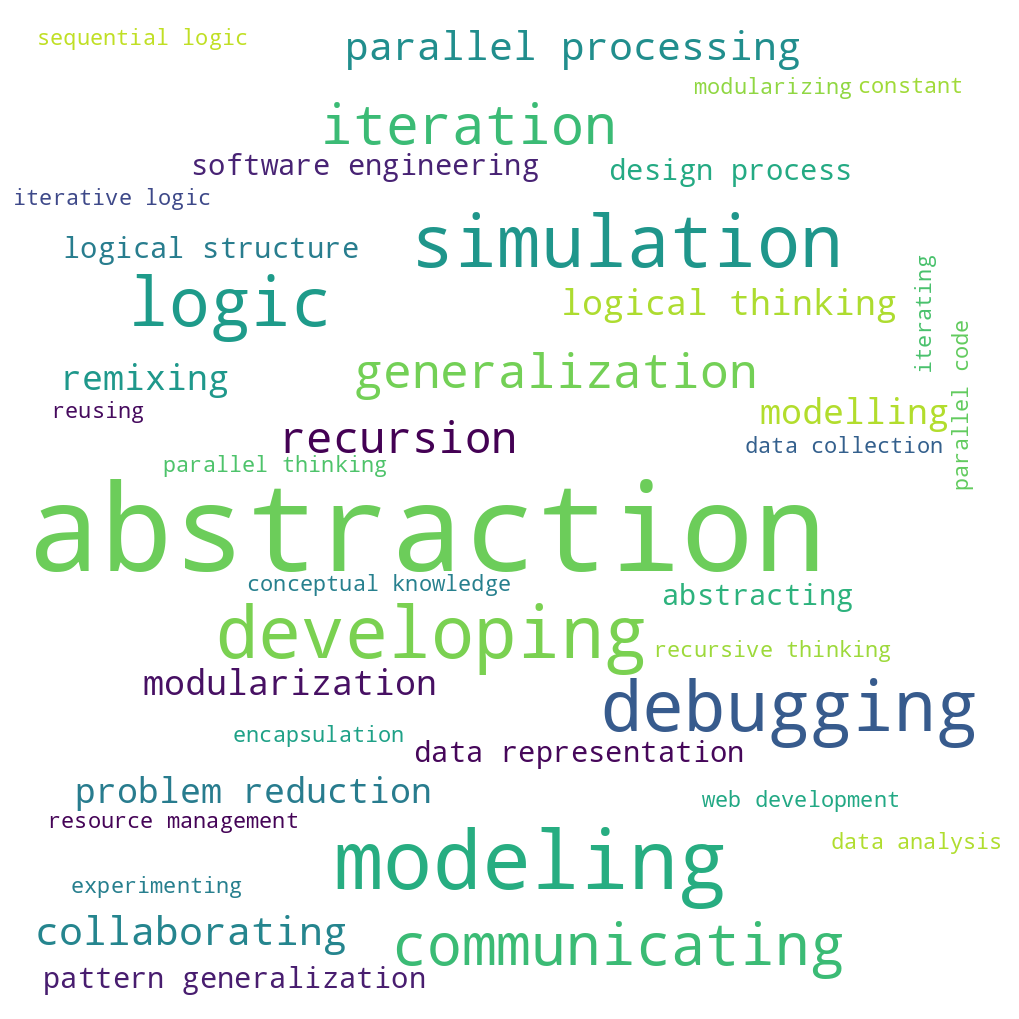

In [ ]:
# 2.
import csv

from wordcloud import WordCloud
from PIL import Image, ImageDraw, ImageFont
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

import nltk
import matplotlib.pyplot as plt


# Inicializar el lematizador de nltk
lemmatizer = WordNetLemmatizer()

# Read the CSV file and extract all words
with open(pd_ct_csv_file, 'r') as csvfile:
    csv_reader = csv.reader(csvfile)
    # Skip the header row
    # next(csv_reader)
    words = [lemmatizer.lemmatize(row[0].lower().replace("''", "")) for row in csv_reader if len(row[0]) != 0 and not row[0].isdigit()]

# Leer el archivo CSV de la lista blanca y extraer todas las palabras en una lista separada
with open(whitelist_file, 'r', encoding='utf-8') as f:
    csv_reader = csv.reader(f)
    whitelist = [word[0] for word in csv_reader if len(word) != 0]

#tokens = nltk.word_tokenize(text)
#text1 = nltk.Text(tokens)

# Remove extra chars and remove stop words.
#text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text1]


bigrams_list = list(nltk.bigrams(words))
#print(bigrams_list)
dictionary2 = [' '.join(tup) for tup in bigrams_list]
#print (dictionary2)

#Using count vectoriser to view the frequency of bigrams
vectorizer = CountVectorizer(ngram_range=(2, 2))
bag_of_words = vectorizer.fit_transform(dictionary2)
vectorizer.vocabulary_
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
#print (words_freq[:100])

word_dict = dict(words_freq)

#print(word_dict)


# Iterar sobre todas las palabras extraídas del archivo CSV y agregar solo aquellas en la lista blanca al objeto WordCloud
whiteword_dict = {}
#Le code parcourt chaque mot dans la liste words.
for word in words:
#Pour chaque mot, il vérifie s'il est présent dans la liste blanche whitelist en utilisant l'instruction if word in whitelist:.
    if word in whitelist:
#Si le mot est dans la liste blanche, le code vérifie si le mot est déjà présent dans le dictionnaire whiteword_dict.
        if word in whiteword_dict:
#Si c'est le cas, il incrémente la valeur associée au mot de 1.
            whiteword_dict[word] += 1
        else:
#Si le mot n'est pas déjà présent dans le dictionnaire, il l'ajoute avec une valeur initiale de 1.
            whiteword_dict[word] = 1


#Remplissage du dictionnaire "whiteword_dict" avec sa fréquence respective en sélectionnant uniquement les mots du dictionnaire word_dict qui sont présents dans la liste blanche whitelist.
for word in word_dict:
    if word in whitelist:
        whiteword_dict[word] = word_dict[word]
        print(word)
        print(whiteword_dict[word])

print(dict(sorted(whiteword_dict.items(), key=lambda x:x[1], reverse=True)))


# Crear un objeto WordCloud y configurarlo según tus preferencias
wordcloud = WordCloud(#font_path='/content/gdrive/My Drive/Colab Notebooks/fonts/Roboto-BoldItalic.ttf',
                      stopwords= stop_words,
                      width=1000, height=1000,
                      max_words=200,
                      background_color='white').generate_from_frequencies(whiteword_dict)  #dici


# Plot the word cloud
plt.figure(figsize=(10, 10), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)

# Show the plot
plt.show()